In [29]:
# Importing essential libraries
import pandas as pd
import pickle
import numpy as np

In [3]:
# Loading the dataset
df = pd.read_csv('ipl.csv')

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [6]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [10]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [11]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [12]:
print("bat_team \n",df['bat_team'].unique())
print("bowl_team \n",df['bowl_team'].unique())

bat_team 
 ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
bowl_team 
 ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [13]:
df['date'].dtypes

dtype('O')

In [14]:
# Converting the column 'date' from string into datetime object
from datetime import datetime

df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [15]:
df['date'].dtypes

dtype('<M8[ns]')

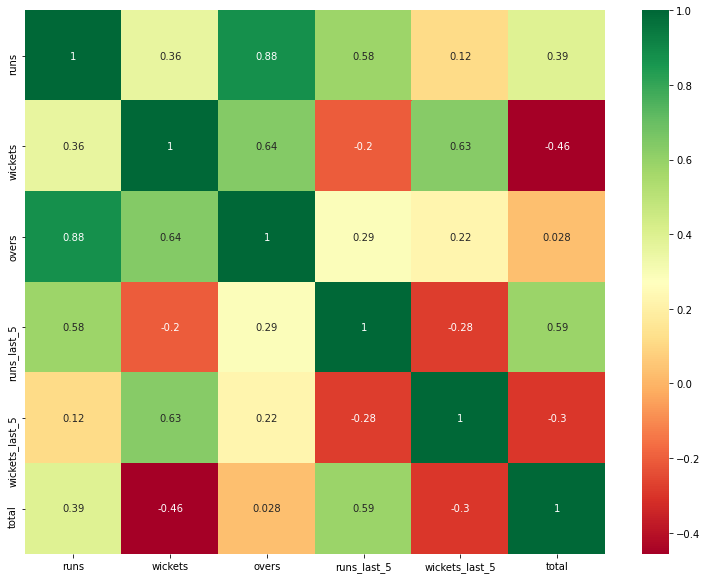

In [25]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [16]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [17]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [19]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [20]:
X_train.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [21]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [22]:
print(y_train)
print(len(y_train))

[222 222 222 ... 208 208 208]
37330


In [23]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [24]:
X_train.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Linear Regression

In [26]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [30]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193244
Mean Squared Error (MSE): 251.007923104173
Root Mean Squared Error (RMSE): 15.843229566732061


Decision Tree

In [31]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [32]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [37]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.033117350611953
Mean Squared Error (MSE): 528.0777537796977
Root Mean Squared Error (RMSE): 22.979942423332954


Random Forest

In [34]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [36]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.673963068668794
Mean Squared Error (MSE): 327.8389893905747
Root Mean Squared Error (RMSE): 18.106324568795696


In [33]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.033117350611953
Mean Squared Error (MSE): 528.0777537796977
Root Mean Squared Error (RMSE): 22.979942423332954


Lets try to boost the performance of the linear regression using AdaBoost

In [38]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [39]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [40]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.140432687430678
Mean Squared Error (MSE): 246.27303459070123
Root Mean Squared Error (RMSE): 15.693088752399932


Ridge Regression

In [43]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [44]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=7)
ridge_regressor.fit(X_train,y_train)

C:\Users\saahi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29141e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\saahi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.45236e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\saahi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42082e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\saahi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.498e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\saahi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42616e-18): result may not be accurate.


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [45]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-325.60658755234766


In [46]:
prediction=ridge_regressor.predict(X_test)

In [47]:
print(prediction)

[172.04976684 175.20021989 174.59538295 ... 100.41375553  99.84095094
  93.18090251]


C:\Users\saahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

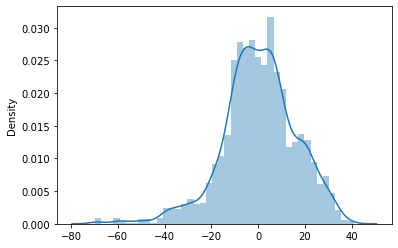

In [48]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [49]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117294527005019
MSE: 251.0317296411273
RMSE: 15.843980864704656


In [50]:
ridge.fit(X_train,y_train)

Ridge()

In [51]:
prediction_noBest=ridge.predict(X_test)

C:\Users\saahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

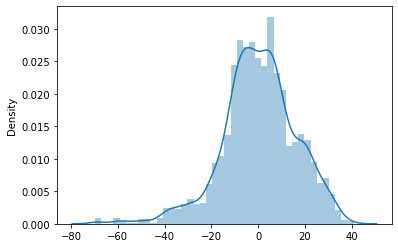

In [52]:
import seaborn as sns
sns.distplot(y_test-prediction_noBest)

In [53]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction_noBest))
print('MSE:', metrics.mean_squared_error(y_test, prediction_noBest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_noBest)))

MAE: 12.118584408251246
MSE: 251.00850756690377
RMSE: 15.843248011910429


In [54]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=ridge, n_estimators=100)
adb_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(), n_estimators=100)

In [55]:
y_pred_adb = adb_regressor.predict(X_test)

In [56]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.121995794122517
Mean Squared Error (MSE): 246.30380154993836
Root Mean Squared Error (RMSE): 15.69406899277362


Lasso Regression

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [68]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=7)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


C:\Users\saahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4695906.67172397, tolerance: 2771.6559176922838
  model = cd_fast.enet_coordinate_descent(
C:\Users\saahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4894515.395057461, tolerance: 2772.407459524329
  model = cd_fast.enet_coordinate_descent(
C:\Users\saahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4676208.171943571, tolerance: 2678.417668606429
  model = cd_fast.enet_coordinate_descent(
C:\Users\saahi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

{'alpha': 1}
-320.5905228443221


C:\Users\saahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

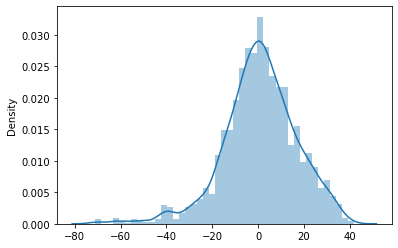

In [69]:
prediction_lasso=lasso_regressor.predict(X_test)
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

In [70]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

MAE: 12.213583996827493
MSE: 262.36538279606964
RMSE: 16.19769683615759
